## Import Library

In [1]:
import pandas as pd
import time
import requests
from io import StringIO

###### Note: 
* Data yang digunakan adalah data transaksi dari perusahaan retail

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Faiqazmi/Dataset_latihan/main/Retail_Data_Transactions.csv', sep=',')
df.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


## Data Understanding

###### Note : 
* Terdapat 3 kolom dan dengan 125000 ribu data/baris
* Tidak terdapat null value (data kosong)
* Terdapat 2 kolom bertipe data string/object (customer_id, trans_date) dan 1 kolom bertipe data integer/int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


###### Note:
* Menampilkan statistika deskriptif untuk kolom bertipe data numeric/integer

In [4]:
df.describe()

,tran_amount
count,125000.000000
mean,64.991912
std,22.860006
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


###### Note:
* Menampilkan statistika deskriptif untuk kolom bertipe data kategorikal atau string

In [5]:
df.describe(include='O')

,customer_id,trans_date
count,125000,125000
unique,6889,1401
top,CS4424,16-Jul-11
freq,39,141


###### Note:
* Melihat dimensi dataframe

In [6]:
df.shape

(125000, 3)

###### Note:
* Melihat jumlah data customer yang unique
* dengan tujuan melihat jumlah customer yang melakukan transaksi

In [7]:
df['customer_id'].nunique()
# len(df['customer_id'].unique())

print('terdapat {} customer dalam jumlah total transaksi sebesar {}'.format(df['customer_id'].nunique(), len(df['customer_id'].values)))

terdapat 6889 customer dalam jumlah total transaksi sebesar 125000


###### Note: 
* Melihat total jumlah transaksi 

In [8]:
print('Total jumlah transaksi : {}'.format(df['tran_amount'].sum()))

Total jumlah transaksi : 8123989


###### Note: 
* Melihat jumlah data time/waktu yang unique

In [9]:
print(df['trans_date'].nunique())

1401


## Recency

In [10]:
# Mendefinisikan 'Recency'
recency = df[['trans_date', 'customer_id']]
recency.head()

,trans_date,customer_id
0,11-Feb-13,CS5295
1,15-Mar-15,CS4768
2,26-Feb-13,CS2122
3,16-Nov-11,CS1217
4,20-Nov-13,CS1850


In [11]:
# melihat data unique untuk tiap koom 'Recency'
recency.apply(pd.Series.nunique).to_frame().reset_index().rename(columns={0:'jumlah', 'index':'nama_kolom'})

,nama_kolom,jumlah
0,trans_date,1401
1,customer_id,6889


In [12]:
# melihat dimensi data 'Recency'
recency.shape

(125000, 2)

In [14]:
# Mentransformasikan tipe data pada kolom 'trans_date' menjadi tipe data date time 
recency['trans_date'] = pd.to_datetime(recency['trans_date'])
recency.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,trans_date,customer_id
0,2013-02-11,CS5295
1,2015-03-15,CS4768
2,2013-02-26,CS2122
3,2011-11-16,CS1217
4,2013-11-20,CS1850


In [15]:
# Recency mengacu kepada data transaksi terbaru
now = max(recency['trans_date'])
now

# alternative 
# now = pd.to_datetime('today')

Timestamp('2015-03-16 00:00:00')

In [17]:
# Mengabungkan nilai 
recency = recency.groupby(['customer_id']).max()
recency

,trans_date
customer_id,
CS1112,2015-01-14
CS1113,2015-02-09
CS1114,2015-02-12
CS1115,2015-03-05
CS1116,2014-08-25
...,...
CS8996,2014-12-09
CS8997,2014-06-28
CS8998,2014-12-22


In [20]:
recency_days = now - recency['trans_date']
recency_days = recency_days.to_frame()
recency_days

,trans_date
customer_id,
CS1112,61 days
CS1113,35 days
CS1114,32 days
CS1115,11 days
CS1116,203 days
...,...
CS8996,97 days
CS8997,261 days
CS8998,84 days


In [54]:
recency = pd.DataFrame(recency_days['trans_date'].astype('timedelta64[D]'))
recency.rename(columns={'trans_date':'recency'}, inplace=True)
recency

,recency
customer_id,
CS1112,61.0
CS1113,35.0
CS1114,32.0
CS1115,11.0
CS1116,203.0
...,...
CS8996,97.0
CS8997,261.0
CS8998,84.0


## Frequency

In [55]:
# Menghitung berapa kali customer melakukan transaksi pembelian
frequency = df[['customer_id', 'trans_date']]
frequency.rename(columns={"trans_date": "frequency"}, inplace = True)
frequency

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,customer_id,frequency
0,CS5295,11-Feb-13
1,CS4768,15-Mar-15
2,CS2122,26-Feb-13
3,CS1217,16-Nov-11
4,CS1850,20-Nov-13
...,...,...
124995,CS8433,26-Jun-11
124996,CS7232,19-Aug-14
124997,CS8731,28-Nov-14
124998,CS8133,14-Dec-13


In [56]:
frequency = frequency.groupby(['customer_id']).count()
frequency.head()

,frequency
customer_id,
CS1112,15
CS1113,20
CS1114,19
CS1115,22
CS1116,13


## Monetary

In [57]:
# Menghitung total nominal transaksi yang dilakukan customer
monetary = df[['customer_id', 'tran_amount']]
monetary.rename(columns={"tran_amount": "monetary"}, inplace=True)
monetary = monetary.groupby(['customer_id']).sum()
monetary

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,monetary
customer_id,
CS1112,1012
CS1113,1490
CS1114,1432
CS1115,1659
CS1116,857
...,...
CS8996,582
CS8997,543
CS8998,624


# Modelling

In [58]:
rfm = pd.concat([recency, frequency, monetary], axis=1)
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,61.0,15,1012
CS1113,35.0,20,1490
CS1114,32.0,19,1432
CS1115,11.0,22,1659
CS1116,203.0,13,857
...,...,...,...
CS8996,97.0,13,582
CS8997,261.0,14,543
CS8998,84.0,13,624


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


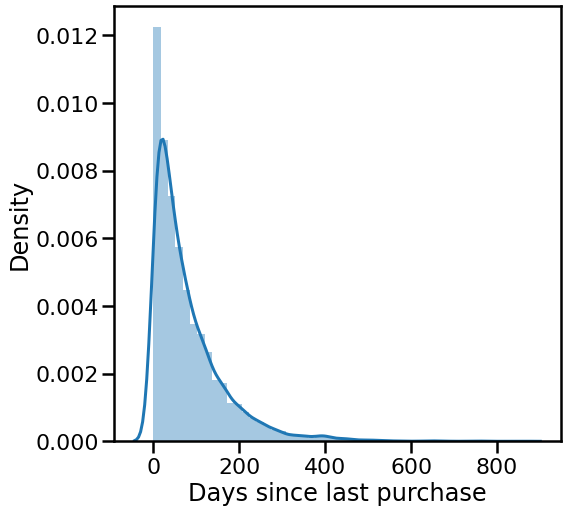

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.distplot(rfm['recency'])
plt.xlabel('Days since last purchase')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


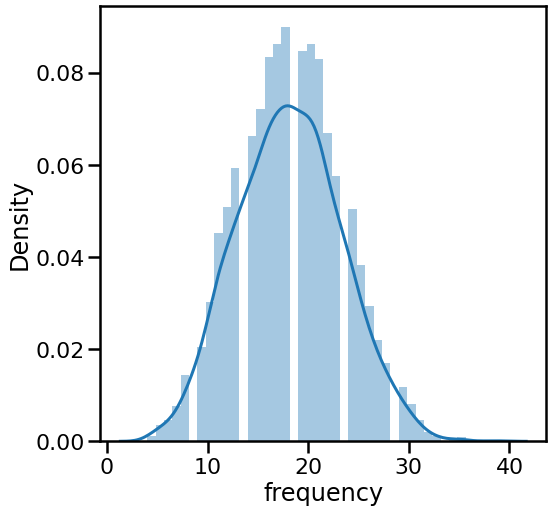

In [60]:
plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.distplot(rfm['frequency']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'IDR')

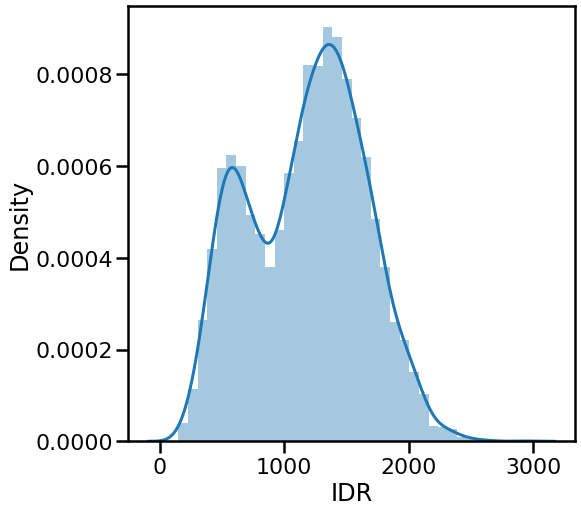

In [61]:
plt.figure(figsize=(8,8))
sns.set_context("poster")
sns.distplot(rfm['monetary'])
plt.xlabel('IDR')

In [62]:
rfm.quantile([.33, .66, 1], axis=0) 

,recency,frequency,monetary
0.33,30.0,16.0,973.0
0.66,85.0,20.0,1414.0
1.00,857.0,39.0,2933.0


In [63]:
RFMscores = rfm.copy()
RFMscores.shape

(6889, 3)

In [64]:
RFMscores['recency_score']    = pd.qcut(RFMscores['recency'], 3, labels=[3, 2, 1])
RFMscores['frequency_score']  = pd.qcut(RFMscores['frequency'], 3, labels=[1, 2, 3])
RFMscores['monetary_score']   = pd.qcut(RFMscores['monetary'], 3, labels=[1, 2, 3])

In [65]:
RFMscores = RFMscores.reset_index()
RFMscores

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,CS1112,61.0,15,1012,2,1,2
1,CS1113,35.0,20,1490,2,2,3
2,CS1114,32.0,19,1432,2,2,3
3,CS1115,11.0,22,1659,3,3,3
4,CS1116,203.0,13,857,1,1,1
...,...,...,...,...,...,...,...
6884,CS8996,97.0,13,582,1,1,1
6885,CS8997,261.0,14,543,1,1,1
6886,CS8998,84.0,13,624,2,1,1
6887,CS8999,257.0,12,383,1,1,1


In [66]:
# Convert tipe data
RFMscores['recency_score']    = RFMscores.recency_score.astype(int)
RFMscores['frequency_score']  = RFMscores.frequency_score.astype(int)
RFMscores['monetary_score']   = RFMscores.monetary_score.astype(int)
RFMscores['rfm_score'] = RFMscores['recency_score'].map(str) + RFMscores['frequency_score'].map(str) + RFMscores['monetary_score'].map(str)


RFMscores

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,CS1112,61.0,15,1012,2,1,2,212
1,CS1113,35.0,20,1490,2,2,3,223
2,CS1114,32.0,19,1432,2,2,3,223
3,CS1115,11.0,22,1659,3,3,3,333
4,CS1116,203.0,13,857,1,1,1,111
...,...,...,...,...,...,...,...,...
6884,CS8996,97.0,13,582,1,1,1,111
6885,CS8997,261.0,14,543,1,1,1,111
6886,CS8998,84.0,13,624,2,1,1,211
6887,CS8999,257.0,12,383,1,1,1,111


In [68]:
url2 = "https://raw.githubusercontent.com/Faiqazmi/Dataset_latihan/main/rfm_score_dim.csv"
rfm_score_reference = pd.read_csv(StringIO(requests.get(url2).text), error_bad_lines=False)
rfm_score_reference['rfm_score']   = rfm_score_reference.rfm_score.map(str)

rfm_score_reference

,segment_name,rfm_score
0,ABOUT TO SLEEP,112
1,ABOUT TO SLEEP,113
2,ABOUT TO SLEEP,121
3,ABOUT TO SLEEP,122
4,ABOUT TO SLEEP,131
5,ABOUT TO SLEEP,211
6,ABOUT TO SLEEP,212
7,ABOUT TO SLEEP,221
8,RECENT CUSTOMER,311
9,RECENT CUSTOMER,312


In [69]:
RFMscores = pd.merge(RFMscores, rfm_score_reference, on=['rfm_score'])
RFMscores

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment_name
0,CS1112,61.0,15,1012,2,1,2,212,ABOUT TO SLEEP
1,CS1122,42.0,16,1156,2,1,2,212,ABOUT TO SLEEP
2,CS1208,35.0,15,1000,2,1,2,212,ABOUT TO SLEEP
3,CS1262,84.0,16,1040,2,1,2,212,ABOUT TO SLEEP
4,CS1265,51.0,14,1128,2,1,2,212,ABOUT TO SLEEP
...,...,...,...,...,...,...,...,...,...
6884,CS7624,39.0,21,802,2,3,1,231,AVERAGE
6885,CS7969,40.0,21,891,2,3,1,231,AVERAGE
6886,CS8179,81.0,23,960,2,3,1,231,AVERAGE
6887,CS8263,39.0,21,810,2,3,1,231,AVERAGE


## Insight

In [70]:
RFMscores.groupby('segment_name')['monetary'].agg(total_monetary='sum', number_customer='count')

,total_monetary,number_customer
segment_name,,
ABOUT TO SLEEP,1590540,1681
AVERAGE,687751,580
CANNOT LOOSE THEM,906097,555
CHAMPION,1478706,859
LOST CUSTOMER,551584,931
LOYAL,1525492,925
POTENTIAL LOYALIST,857517,663
RECENT CUSTOMER,526302,695


In [71]:
RFMscores.groupby('segment_name')['frequency'].agg(total_monetary='sum', number_customer='count')

,total_monetary,number_customer
segment_name,,
ABOUT TO SLEEP,26018,1681
AVERAGE,10623,580
CANNOT LOOSE THEM,12862,555
CHAMPION,20938,859
LOST CUSTOMER,11043,931
LOYAL,21690,925
POTENTIAL LOYALIST,12564,663
RECENT CUSTOMER,9262,695


In [72]:
RFMscores.groupby('segment_name')['recency'].agg(mean_recentcy_days='mean', number_customer='count')

,mean_recentcy_days,number_customer
segment_name,,
ABOUT TO SLEEP,106.145152,1681
AVERAGE,50.274138,580
CANNOT LOOSE THEM,141.439640,555
CHAMPION,13.941793,859
LOST CUSTOMER,201.312567,931
LOYAL,46.380541,925
POTENTIAL LOYALIST,24.689291,663
RECENT CUSTOMER,14.490647,695
